In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##

## Data Collection & Analysis


In [2]:
df = pd.read_csv("D:\\medical\\medical_insurance.csv")

In [3]:
# first 5 rows of the dataframe
df.head()

,age,bmi,children,charges,has_children,is_north,bmi_age_interaction,log_charges,smoker_obese_interaction,high_charges,...,smoker_no,smoker_yes,bmi_Normal,bmi_Obese,bmi_Overweight,bmi_Underweight,age_Adult,age_Senior,age_Young Adult,diabetic
0,19,27.350474,0,14391.519443,0,0,519.659014,9.797594,0,1,...,0,1,0,0,1,0,0,0,1,0
1,19,62.940442,1,3235.821590,1,0,635.077831,7.677036,0,0,...,1,0,0,1,0,0,0,0,1,1
2,28,33.008086,3,8340.889187,1,0,924.226408,8.623640,0,0,...,1,0,0,1,0,0,0,0,1,1
3,32,23.188802,0,17500.369357,0,1,742.041680,9.993167,0,1,...,1,0,1,0,0,0,1,0,0,0
4,83,70.120825,0,2946.374085,0,1,879.914951,8.211746,0,0,...,1,0,0,0,1,0,1,0,0,0


In [4]:
# Getting some informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42580 entries, 0 to 42579
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       42580 non-null  int64  
 1   bmi                       42580 non-null  float64
 2   children                  42580 non-null  int64  
 3   charges                   42580 non-null  float64
 4   has_children              42580 non-null  int64  
 5   is_north                  42580 non-null  int64  
 6   bmi_age_interaction       42580 non-null  float64
 7   log_charges               42580 non-null  float64
 8   smoker_obese_interaction  42580 non-null  int64  
 9   high_charges              42580 non-null  int64  
 10  children_category         23790 non-null  object 
 11  bmi_children_interaction  42580 non-null  float64
 12  region_northeast          42580 non-null  int64  
 13  region_northwest          42580 non-null  int64  
 14  region

In [5]:

# Checking missing values
df.isnull().sum()

age                             0
bmi                             0
children                        0
charges                         0
has_children                    0
is_north                        0
bmi_age_interaction             0
log_charges                     0
smoker_obese_interaction        0
high_charges                    0
children_category           18790
bmi_children_interaction        0
region_northeast                0
region_northwest                0
region_southeast                0
region_southwest                0
sex_female                      0
sex_male                        0
smoker_no                       0
smoker_yes                      0
bmi_Normal                      0
bmi_Obese                       0
bmi_Overweight                  0
bmi_Underweight                 0
age_Adult                       0
age_Senior                      0
age_Young Adult                 0
diabetic                        0
dtype: int64

In [6]:
df = df.drop(columns=["children_category"])

In [7]:
df.isnull().sum()

age                         0
bmi                         0
children                    0
charges                     0
has_children                0
is_north                    0
bmi_age_interaction         0
log_charges                 0
smoker_obese_interaction    0
high_charges                0
bmi_children_interaction    0
region_northeast            0
region_northwest            0
region_southeast            0
region_southwest            0
sex_female                  0
sex_male                    0
smoker_no                   0
smoker_yes                  0
bmi_Normal                  0
bmi_Obese                   0
bmi_Overweight              0
bmi_Underweight             0
age_Adult                   0
age_Senior                  0
age_Young Adult             0
diabetic                    0
dtype: int64

##### There are no missing values as such

In [8]:
#checking duplicate values
df.duplicated().sum()

5

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,age,bmi,children,charges,has_children,is_north,bmi_age_interaction,log_charges,smoker_obese_interaction,high_charges,...,smoker_no,smoker_yes,bmi_Normal,bmi_Obese,bmi_Overweight,bmi_Underweight,age_Adult,age_Senior,age_Young Adult,diabetic
0,19,27.350474,0,14391.519443,0,0,519.659014,9.797594,0,1,...,0,1,0,0,1,0,0,0,1,0
1,19,62.940442,1,3235.821590,1,0,635.077831,7.677036,0,0,...,1,0,0,1,0,0,0,0,1,1
2,28,33.008086,3,8340.889187,1,0,924.226408,8.623640,0,0,...,1,0,0,1,0,0,0,0,1,1
3,32,23.188802,0,17500.369357,0,1,742.041680,9.993167,0,1,...,1,0,1,0,0,0,1,0,0,0
4,83,70.120825,0,2946.374085,0,1,879.914951,8.211746,0,0,...,1,0,0,0,1,0,1,0,0,0


In [12]:
# Check Categorical & Numerical features
num_cols = df.iloc[:,:-1].select_dtypes(include= np.number).columns.tolist()

cat_cols = df.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns are: {num_cols}")
print(f"Categorical Columns are: {cat_cols}")

Numerical Columns are: ['age', 'bmi', 'children', 'charges', 'has_children', 'is_north', 'bmi_age_interaction', 'log_charges', 'smoker_obese_interaction', 'high_charges', 'bmi_children_interaction', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'bmi_Normal', 'bmi_Obese', 'bmi_Overweight', 'bmi_Underweight', 'age_Adult', 'age_Senior', 'age_Young Adult']
Categorical Columns are: []


In [13]:
# 1. Combine sex columns
# ------------------------------
df["sex"] = df.apply(lambda row: "Female" if row["sex_female"] == 1 else "Male", axis=1)
df.drop(columns=["sex_female", "sex_male"], inplace=True)

# ------------------------------
# 2. Combine smoker columns
# ------------------------------
df["smoker"] = df.apply(lambda row: "Yes" if row["smoker_yes"] == 1 else "No", axis=1)
df.drop(columns=["smoker_yes", "smoker_no"], inplace=True)

# ------------------------------
# 3. Combine region columns
# ------------------------------
region_map = {
    "region_northeast": "northeast",
    "region_northwest": "northwest",
    "region_southeast": "southeast",
    "region_southwest": "southwest"
}
df["region"] = df[[*region_map.keys()]].idxmax(axis=1).map(region_map)
df.drop(columns=region_map.keys(), inplace=True)

# ------------------------------
# 4. Combine BMI categories
# ------------------------------
bmi_map = {
    "bmi_Normal": "Normal",
    "bmi_Obese": "Obese",
    "bmi_Overweight": "Overweight",
    "bmi_Underweight": "Underweight"
}
df["bmi_category"] = df[[*bmi_map.keys()]].idxmax(axis=1).map(bmi_map)
df.drop(columns=bmi_map.keys(), inplace=True)

# ------------------------------
# 5. Combine Age categories
# ------------------------------
age_map = {
    "age_Adult": "Adult",
    "age_Senior": "Senior",
    "age_Young Adult": "Young Adult"
}
df["age_group"] = df[[*age_map.keys()]].idxmax(axis=1).map(age_map)
df.drop(columns=age_map.keys(), inplace=True)


## Analysis

#### Age

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\789184501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


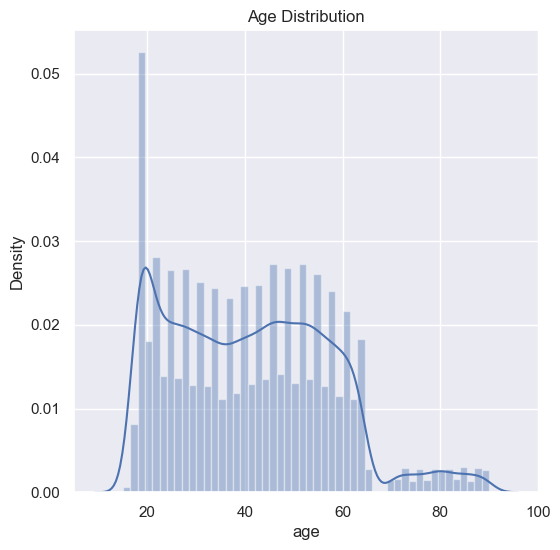

In [14]:
# Distributaion of age value
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

##### Gender

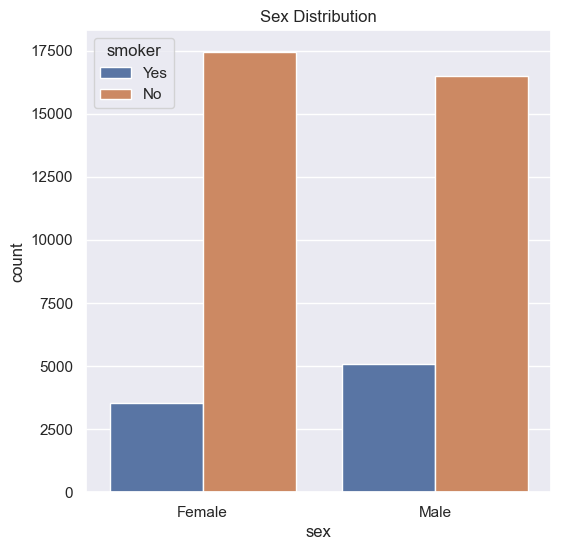

In [15]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = df, hue='smoker')
plt.title('Sex Distribution')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\371344849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data = df, palette={'Male' :'grey', 'Female' : 'orange'})


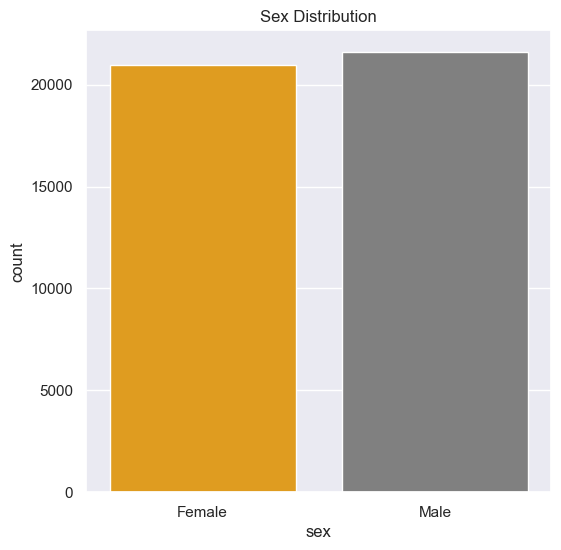

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = df, palette={'Male' :'grey', 'Female' : 'orange'})
plt.title('Sex Distribution')
plt.show()

In [17]:
df['sex'].value_counts()

sex
Male      21595
Female    20980
Name: count, dtype: int64

##### BMI

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\3422855073.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


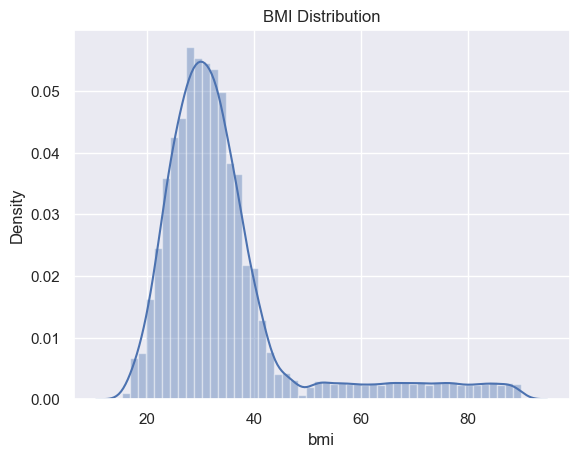

In [18]:
# BMI Distribution
plt.plot(figsize=(6, 6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

##### Children

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\4164432828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='children', data=df, palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

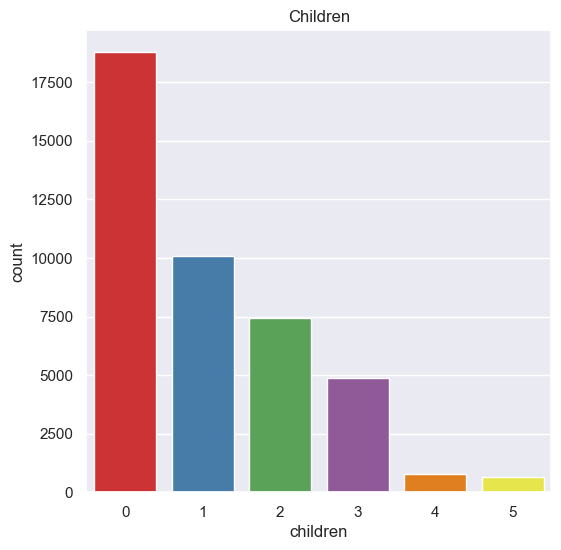

In [19]:
# Children column
plt.figure(figsize=(6, 6))
sns.countplot(x ='children', data=df, palette='Set1')
plt.title('Children')
plt.show

In [20]:
df['children'].value_counts()

children
0    18785
1    10080
2     7440
3     4860
4      780
5      630
Name: count, dtype: int64

##### Smoker

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\3979803728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'smoker', data=df, palette='Set2')


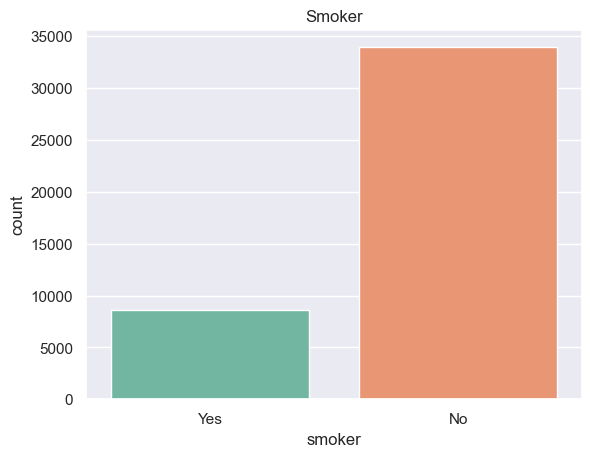

In [21]:
# Smoker column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'smoker', data=df, palette='Set2')
plt.title('Smoker')
plt.show()

In [22]:
df['smoker'].value_counts()

smoker
No     33936
Yes     8639
Name: count, dtype: int64

##### Region

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\3688058314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'region', data=df, palette='Set1')


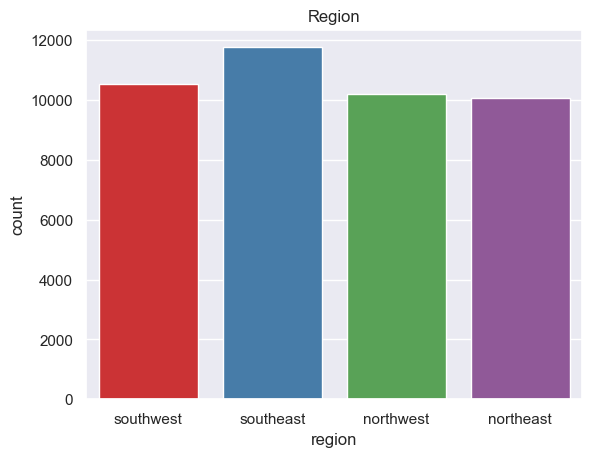

In [23]:
# Region column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'region', data=df, palette='Set1')
plt.title('Region')
plt.show()

In [24]:
df['region'].value_counts()

region
southeast    11767
southwest    10522
northwest    10208
northeast    10078
Name: count, dtype: int64

##### Charges

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\1045518936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


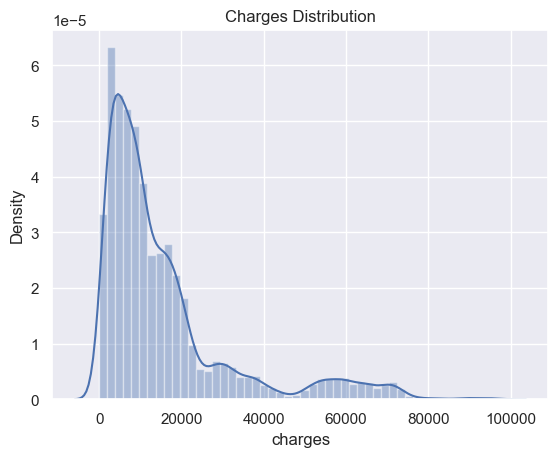

In [25]:
# Charges Distribution
plt.plot(figsize=(6, 6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

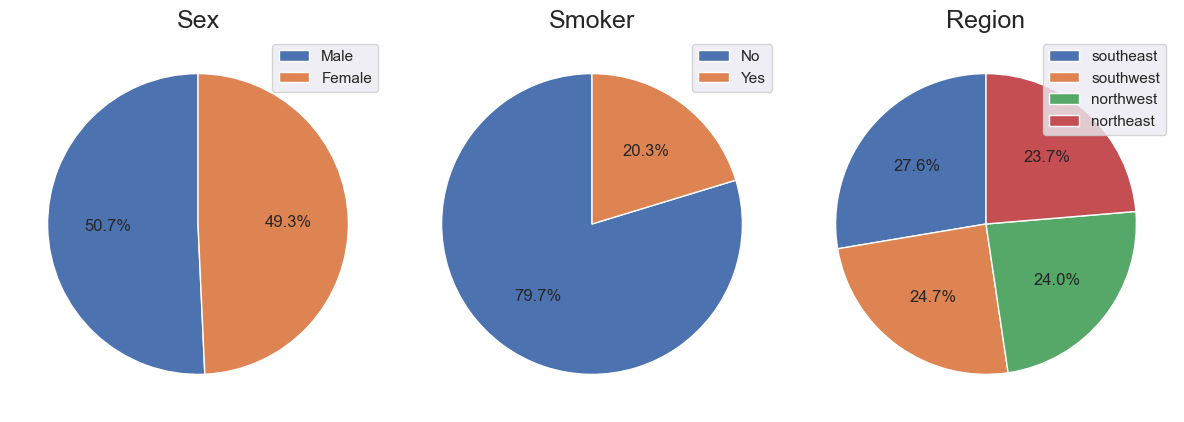

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

axs[0].pie((df['sex']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[0].set_title('Sex', fontsize = 18)
axs[0].legend(labels = df['sex'].value_counts().index, loc='upper right')

axs[1].pie((df['smoker']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[1].set_title('Smoker', fontsize = 18)
axs[1].legend(labels = df['smoker'].value_counts().index, loc='upper right')

axs[2].pie((df['region']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[2].set_title('Region', fontsize = 18)
axs[2].legend(labels = df['region'].value_counts().index, loc='upper right')

plt.tight_layout()
plt.show()


<Axes: ylabel='age'>

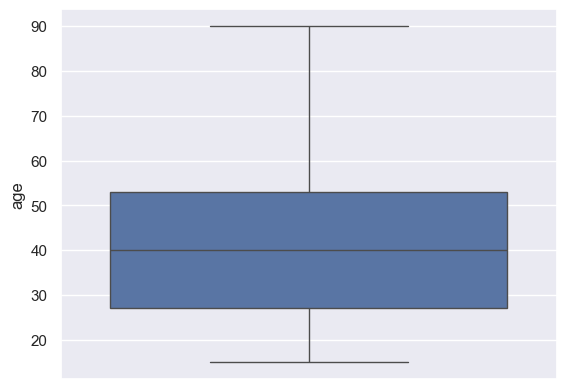

In [27]:

sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

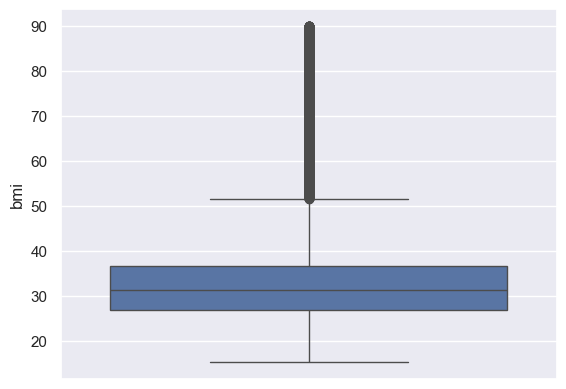

In [28]:

sns.boxplot(df['bmi'])

In [29]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

11.908904263371863
51.6794013780529


In [30]:
# Define caps
min_cap = 11.908904263371863
max_cap = 51.6794013780529

# Apply capping
df['bmi'] = df['bmi'].clip(lower=min_cap, upper=max_cap)


<Axes: ylabel='bmi'>

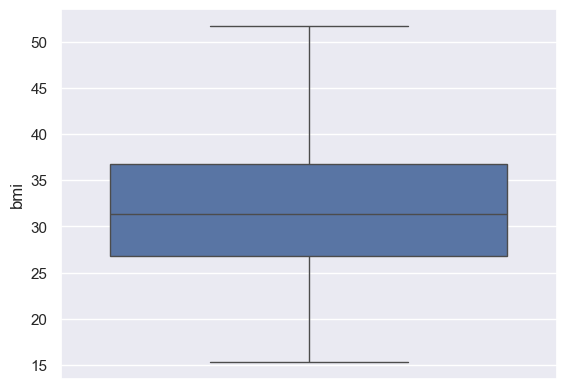

In [31]:

sns.boxplot(df['bmi'])

## Data Pre Processing

#### Encoding the categorical features

In [32]:
# Encoding sex column
df.replace({
    'sex':{
        'Male':0,
        'Female':1
    }}, inplace= True)

# Encoding smoker column
df.replace({
    'smoker':{
        'No':0,
        'Yes':1
    }}, inplace= True)

# Encoding region column
df.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':2,
        'northeast':3
    }}, inplace= True)

df.replace({
    'bmi_category': {
        'Underweight': 0,
        'Normal': 1,
        'Overweight': 2,
        'Obese': 3
    },
    'age_group': {
        'Young Adult': 0,
        'Adult': 1,
        'Senior': 2
    }
}, inplace=True)


df.head()




C:\Users\HP\AppData\Local\Temp\ipykernel_26116\361639135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({
C:\Users\HP\AppData\Local\Temp\ipykernel_26116\361639135.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({
C:\Users\HP\AppData\Local\Temp\ipykernel_26116\361639135.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

,age,bmi,children,charges,has_children,is_north,bmi_age_interaction,log_charges,smoker_obese_interaction,high_charges,bmi_children_interaction,diabetic,sex,smoker,region,bmi_category,age_group
0,19,27.350474,0,14391.519443,0,0,519.659014,9.797594,0,1,0.000000,0,1,1,1,2,0
1,19,51.679401,1,3235.821590,1,0,635.077831,7.677036,0,0,33.425149,1,0,0,0,3,0
2,28,33.008086,3,8340.889187,1,0,924.226408,8.623640,0,0,99.024258,1,0,0,0,3,0
3,32,23.188802,0,17500.369357,0,1,742.041680,9.993167,0,1,0.000000,0,0,0,2,1,1
4,83,51.679401,0,2946.374085,0,1,879.914951,8.211746,0,0,0.000000,0,0,0,2,2,1


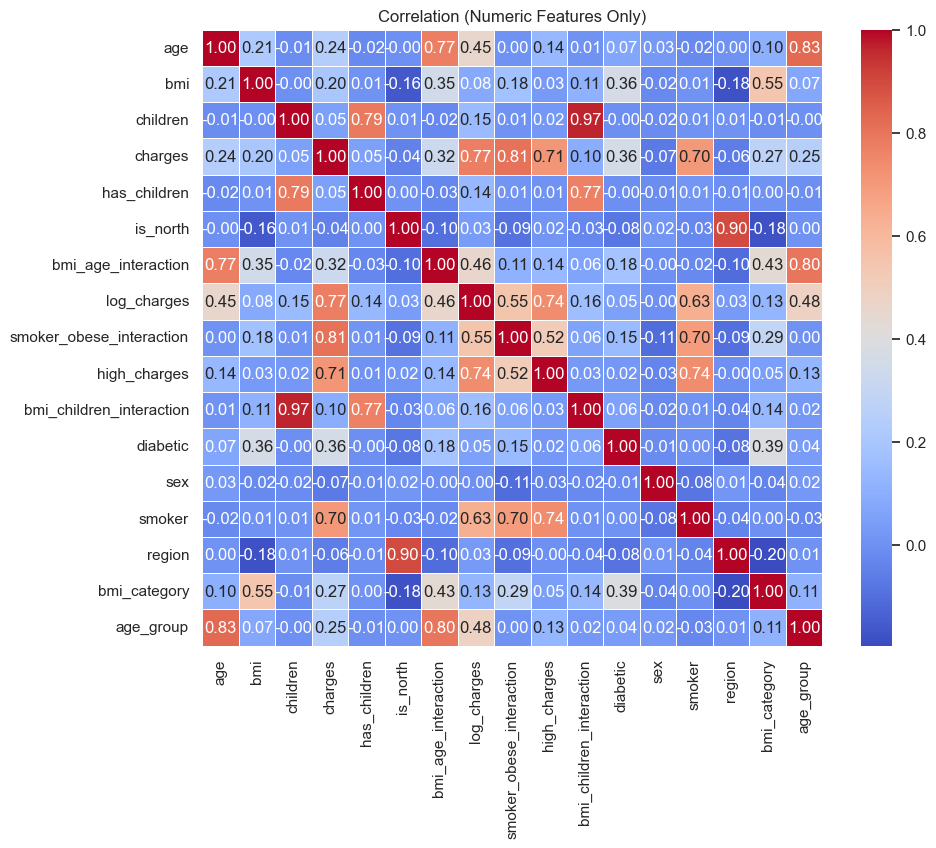

In [33]:
# Compute correlation only on numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation (Numeric Features Only)')
plt.show()


### Splitting the Features and Target

In [34]:
X= df.drop(columns='charges', axis=1)
y= df['charges']
print(X)

       age        bmi  children  has_children  is_north  bmi_age_interaction  \
0       19  27.350474         0             0         0           519.659014   
1       19  51.679401         1             1         0           635.077831   
2       28  33.008086         3             1         0           924.226408   
3       32  23.188802         0             0         1           742.041680   
4       83  51.679401         0             0         1           879.914951   
...    ...        ...       ...           ...       ...                  ...   
42575   77  30.140523         0             0         1          2320.820270   
42576   71  39.880051         0             0         0          2831.483615   
42577   80  40.097722         0             0         0          3207.817748   
42578   71  28.653954         0             0         1          2034.430750   
42579   76  40.705577         0             0         0          3093.623848   

       log_charges  smoker_obese_intera

In [35]:
print(y)

0        14391.519443
1         3235.821590
2         8340.889187
3        17500.369357
4         2946.374085
             ...     
42575    12793.097007
42576    24231.993902
42577    22591.024947
42578    22157.116011
42579    21417.236312
Name: charges, Length: 42575, dtype: float64


### Splitting the data into Training data & Testing Data

In [36]:

from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

print(X.shape, x_train.shape, x_test.shape)

(42575, 16) (34060, 16) (8515, 16)


## Model Training

In [37]:
from sklearn import tree
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [38]:
lr_model = LinearRegression()

In [39]:
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Model Evaluation

In [40]:
# Prediction on training data
training_data_prediction = lr_model.predict(x_train)

# R squared value
r2_train = metrics.r2_score( y_train, training_data_prediction)
mse_train = metrics.mean_squared_error(y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)


print(f"Linear Regression Modet:")
print(f"MSE Test: {mse_train:.2f}")
print(f"RMSE Test: {rmse_train:.2f}")
print(f"R2 Score Test: {r2_train:.4f}")

Linear Regression Modet:
MSE Test: 27800986.88
RMSE Test: 5272.66
R2 Score Test: 0.8983


In [41]:
# Prediction on test data
test_data_prediction = lr_model.predict(x_test)

# R squared value
r2_test = metrics.r2_score( y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(y_test, test_data_prediction)
rmse_test = np.sqrt(mse_test)


print(f"Linear Regression Modet:")
print(f"MSE Test: {mse_test:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R2 Score Test: {r2_test:.4f}")

Linear Regression Modet:
MSE Test: 27493155.82
RMSE Test: 5243.39
R2 Score Test: 0.8972


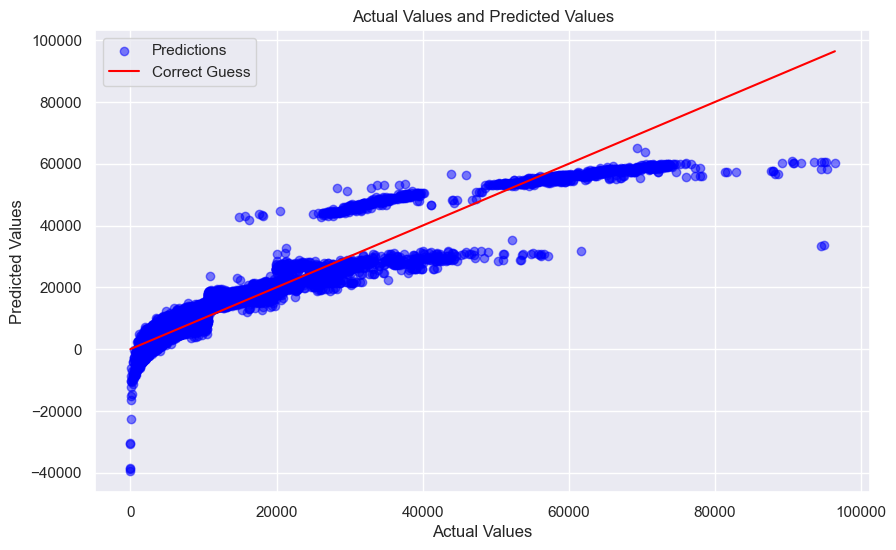

In [42]:
# Combine actual values and estimated values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, test_data_prediction, color='blue', alpha= 0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Correct Guess')

plt.title("Actual Values and Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

###  Decision Tree Regressor 

In [46]:
tree_model = DecisionTreeRegressor()

tree_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [47]:
# Prediction on test data
test_data_prediction = tree_model.predict(x_test)

# R squared value
r2_test_tree = metrics.r2_score( y_test, test_data_prediction)


print(f"Decision Tree Model:")
print(f"R2 Score Test: {r2_test_tree:.4f}")

Decision Tree Model:
R2 Score Test: 1.0000


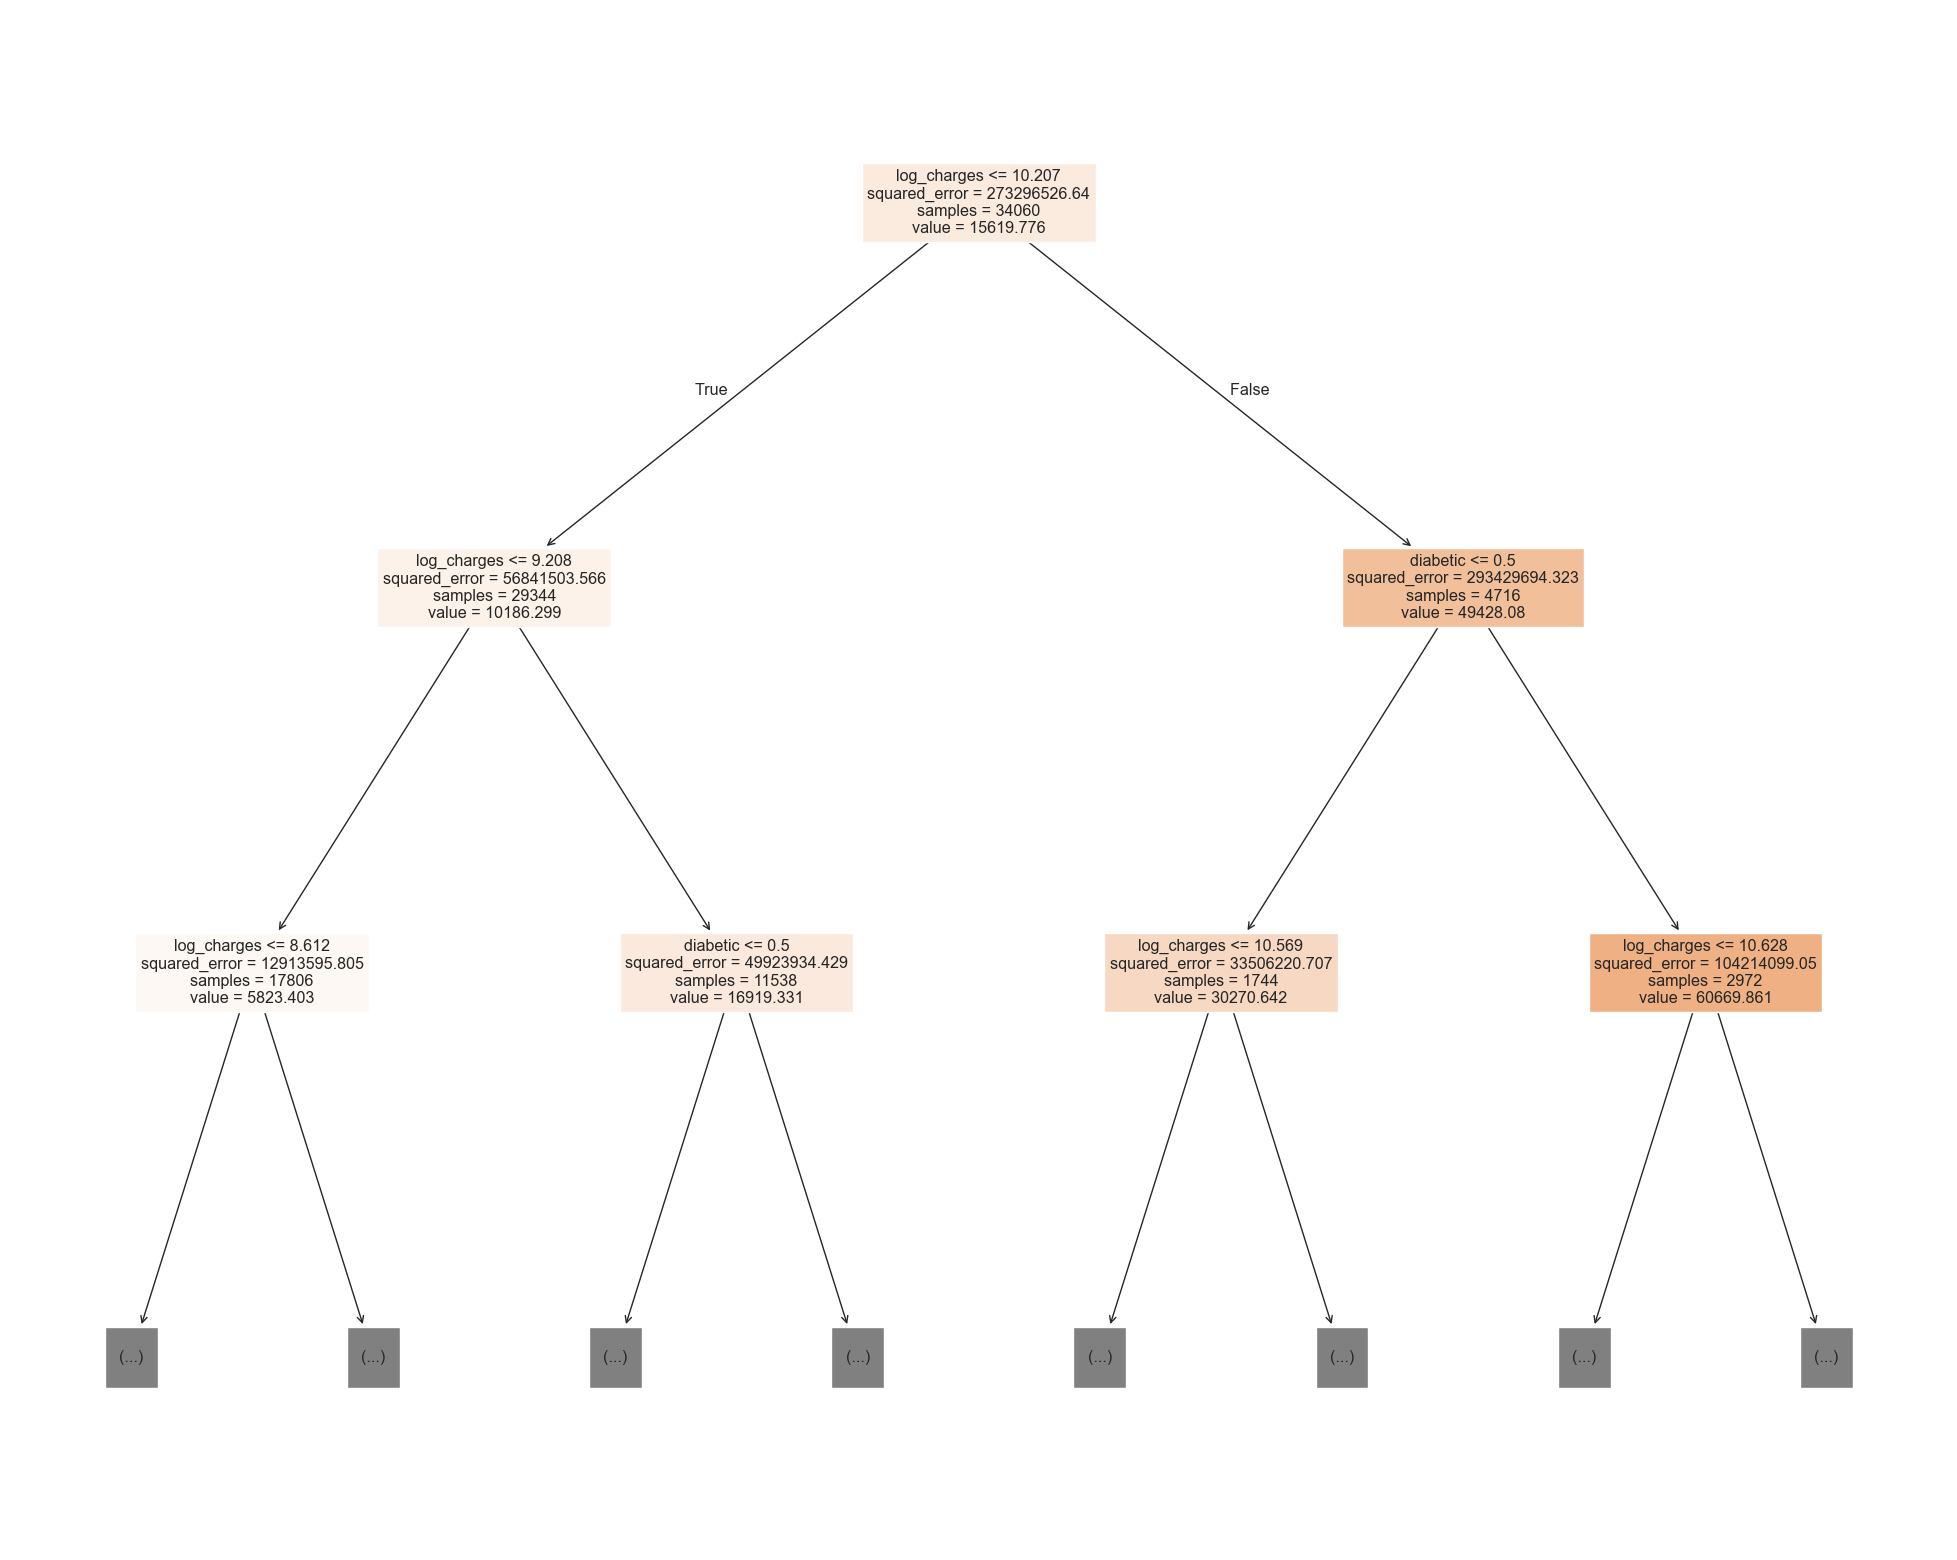

In [48]:
# Visualiza the decision tree
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(tree_model, feature_names = list(x_train.columns), max_depth= 2, filled= True)

### Random Forest 

In [56]:
rf_model= RandomForestRegressor()
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# Prediction on test data
train_data_prediction_rf = rf_model.predict(x_train)

# R squared value
r2_train_rf = metrics.r2_score( y_train, train_data_prediction_rf)


print("Random Forest Model:")
print(f"R2 Score Train: {r2_train_rf:.4f}")

Random Forest Model:
R2 Score Train: 1.0000


In [58]:
# Prediction on test data
test_data_prediction_rf = rf_model.predict(x_test)  


# R squared value
r2_test_rf = metrics.r2_score( y_test, test_data_prediction_rf)


print("Random Forest Model:")
print(f"R2 Score Test: {r2_test_rf:.4f}")

Random Forest Model:
R2 Score Test: 1.0000


XGBOOST

In [ ]:
XGB_model = XGBRegressor()
# Define hyperparemeter grid
param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [3, 4, 5],
    'regressor__learning_rate': [0.5, 0.08, 0.1],
}

# Set up GridSearchCV
grid = GridSearchCV(XGB_model, param_grid , cv=3, scoring='r2', verbose=1)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_

In [59]:
# Predict on test data
y_pred_test = best_model.predict(x_test)

#  Calculate evaluation metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
mae = metrics.mean_absolute_error(y_test, y_pred_test)
r2 = metrics. r2_score(y_test,y_pred_test)

#  Display results
print(" Test Set Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

 Test Set Evaluation:
Root Mean Squared Error (RMSE): 139.82
Mean Absolute Error (MAE): 65.98
R² Score: 1.00


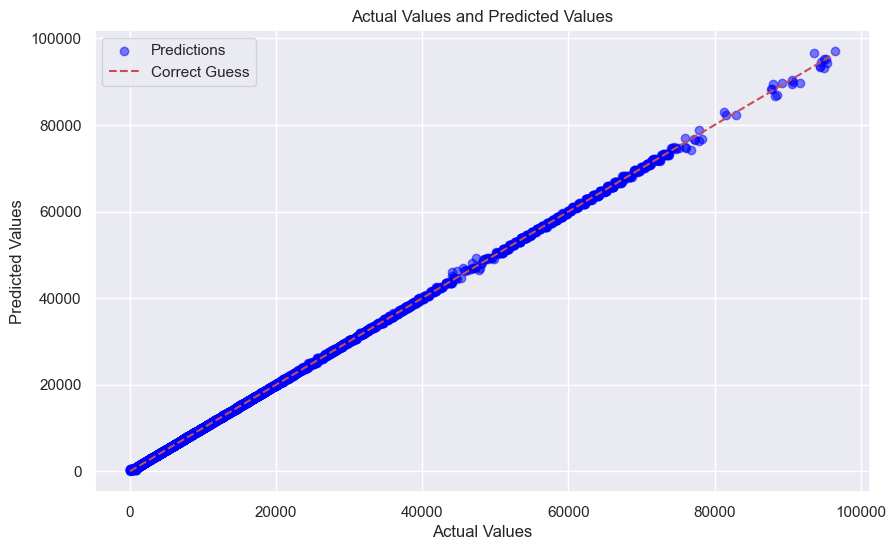

In [60]:
# Combine actual values and estimated values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_test, color='blue', alpha= 0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Correct Guess')

plt.title("Actual Values and Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from xgboost import XGBRegressor

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model (you can replace with best params)
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

# R² scores
r2_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')

# RMSE scores (negative MSE -> sqrt)
rmse_scores = np.sqrt(-cross_val_score(
    xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error'
))

print("🔹 XGBoost K-Fold Cross Validation Results (5 folds):")
print(f"R² Scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")


🔹 XGBoost K-Fold Cross Validation Results (5 folds):
R² Scores: [0.99991905 0.99989275 0.99989471 0.99992131 0.99992229]
Mean R²: 0.9999 ± 0.0000
RMSE Scores: [147.7211637  176.11385776 170.82243169 143.38005955 143.0152059 ]
Mean RMSE: 156.21 ± 14.29


In [ ]:
# ---- Train final model on full dataset (for deployment) ----
xgb_model.fit(X, y)
import pickle
# Save feature names
feature_names = X.columns.tolist()
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

# Save trained XGBoost model
with open("xgb_tuned.pkl", "wb") as f:
    pickle.dump(xgb_model, f)